In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv(r"C:\Users\HOME\Desktop\csv_files\Amazon_store_sales.csv")


#print(df)
Rows,Columns = df.shape
print("Total Rows: ", Rows)
print("Total Columns: ", Columns)

Total Rows:  5901
Total Columns:  21


In [13]:
#Identify null values if any 
print(df.isnull().sum())

Row ID+O6G3A1:R6    0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns             0
Payment Mode        0
dtype: int64


In [17]:
#identify duplicates if any 
print(df.duplicated().sum())

0


Exploratory Data Analysis

In [24]:
#Checking the data type of each column
print(df.dtypes)

Row ID+O6G3A1:R6      int64
Order ID             object
Order Date           object
Ship Date            object
Ship Mode            object
Customer ID          object
Customer Name        object
Segment              object
Country              object
City                 object
State                object
Region               object
Product ID           object
Category             object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Profit              float64
Returns               int64
Payment Mode         object
dtype: object


In [27]:
#Converting Order date from object to Date data type

df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtype)


datetime64[ns]


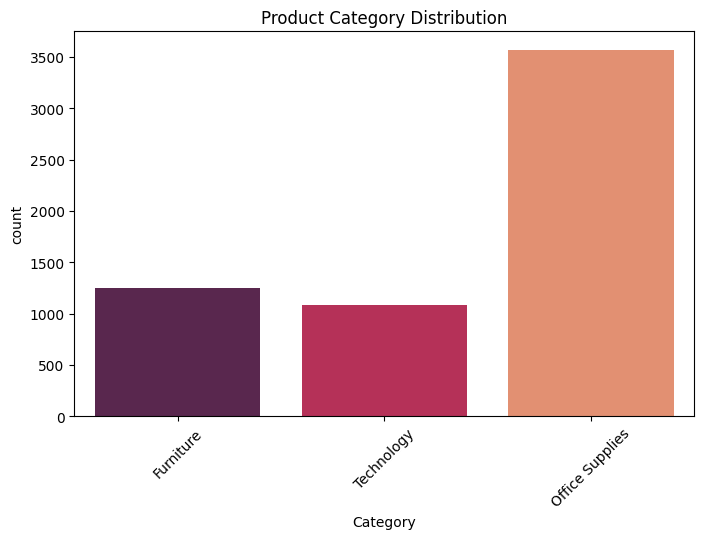

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category',hue = 'Category',palette = 'rocket',dodge = False)
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()

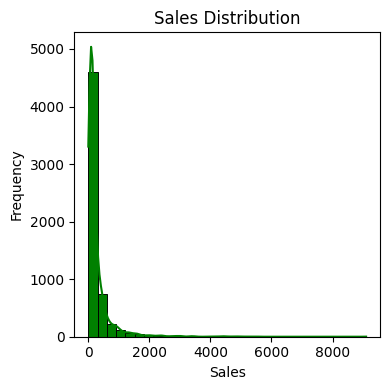

In [103]:

plt.figure(figsize=(4, 4))
sns.histplot(
    df['Sales'],
    kde=True,
    bins=30,
    color='green',
    alpha=1,
    edgecolor='k',
)

plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


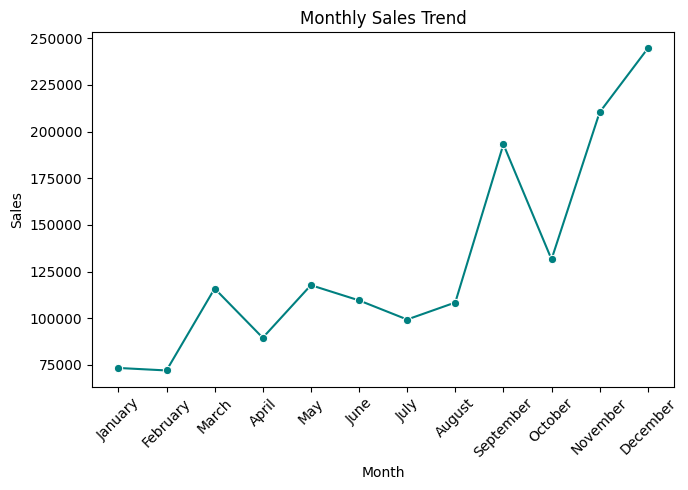

In [77]:
# Ensure 'Order Date' is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Month name and number (to preserve order)
df['Month'] = df['Order Date'].dt.month_name()
df['Month_Num'] = df['Order Date'].dt.month

# Group by Month Number and Month Name for correct order
monthly_sales = df.groupby(['Month_Num', 'Month'])['Sales'].sum().reset_index()

# Sort by Month_Num to ensure correct calendar order
monthly_sales = monthly_sales.sort_values('Month_Num')

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


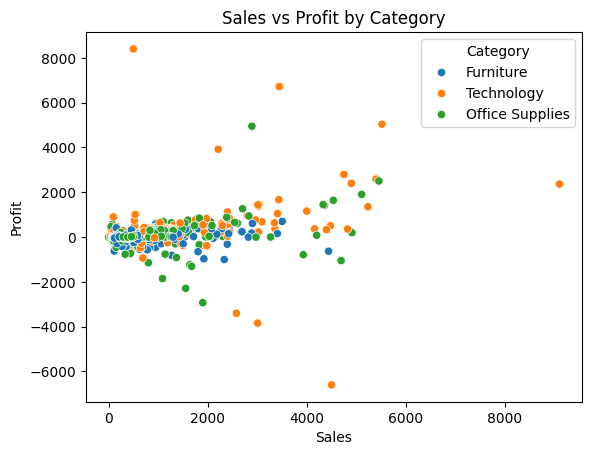

In [81]:
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title("Sales vs Profit by Category")
plt.show()


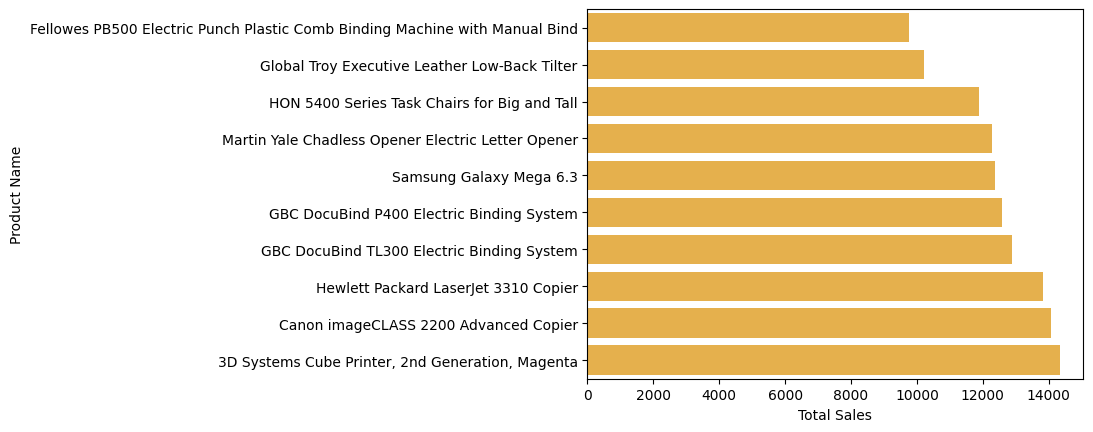

In [99]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data =top_products, x = 'Sales', y = 'Product Name', orient = 'h',color = 'orange',alpha = 0.8)
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()


In [105]:

df.to_csv(r"C:\Users\HOME\Desktop\python\Projects\Amazon_cleaned.csv", index=False)
